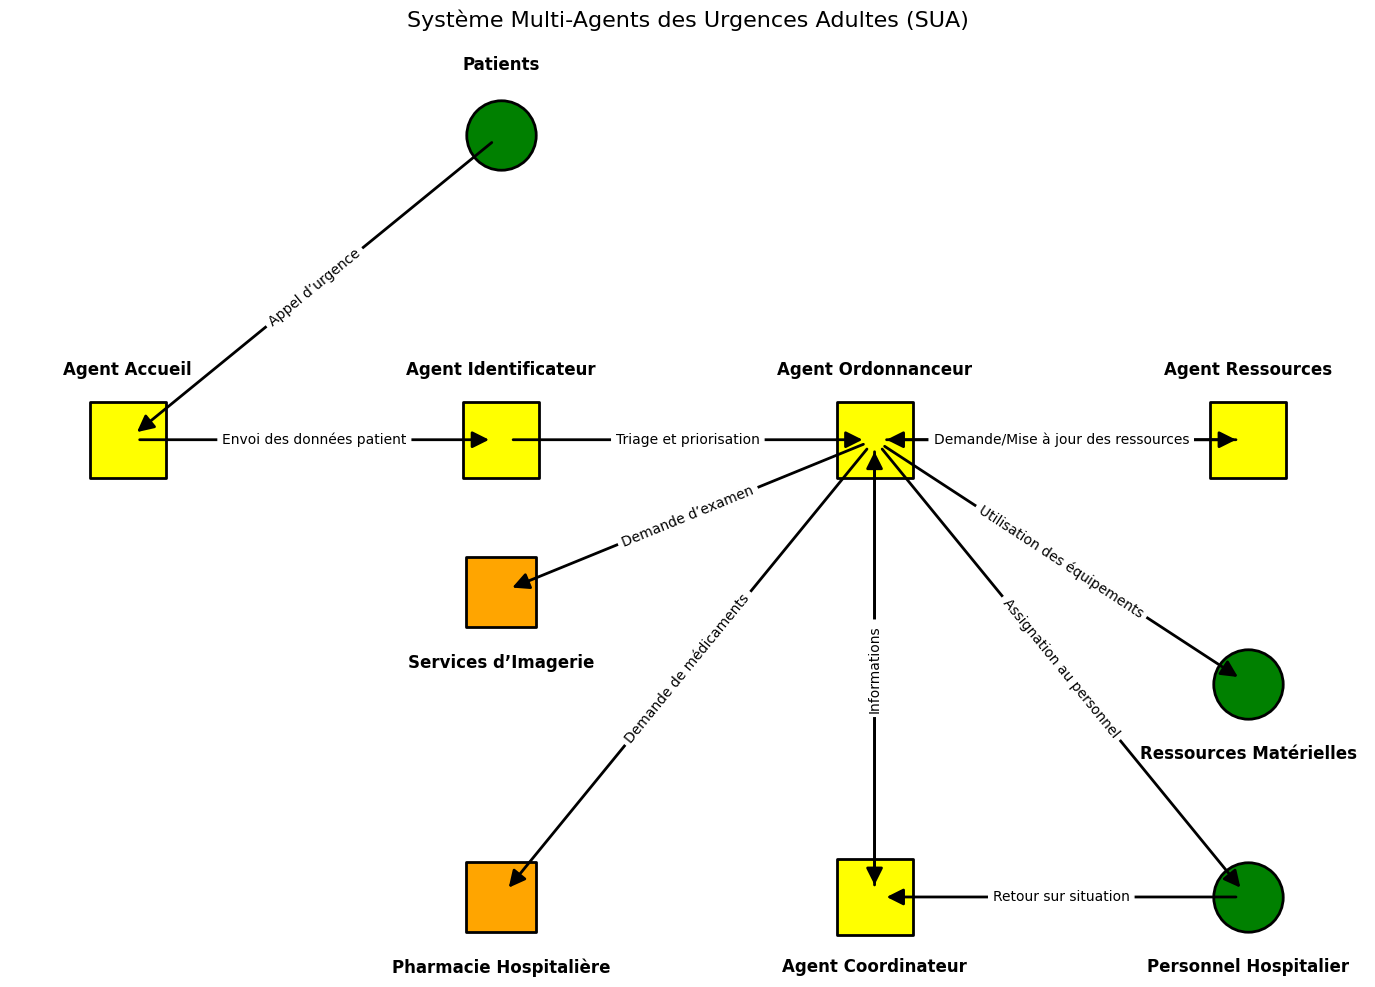

In [1]:
import matplotlib.pyplot as plt
import networkx as nx

# Création du graphe
G = nx.DiGraph()

# Ajout des agents (en jaune, carrés)
agents = ["Agent Accueil", "Agent Identificateur", "Agent Ordonnanceur", "Agent Ressources", "Agent Coordinateur"]
for agent in agents:
    G.add_node(agent, color="yellow")

# Ajout des entités externes (patients, personnel, ressources, services)
external_nodes = [
    ("Patients", "green", "o"),  # Patients en vert, cercles
    ("Personnel Hospitalier", "green", "o"),  # Personnel en vert, cercles
    ("Ressources Matérielles", "green", "o"),  # Ressources matérielles en vert, cercles
    ("Services d’Imagerie", "orange", "s"),  # Services en orange, carrés
    ("Pharmacie Hospitalière", "orange", "s")  # Pharmacie en orange, carrés
]
for node, color, shape in external_nodes:
    G.add_node(node, color=color, shape=shape)

# Ajout des interactions (flèches avec étiquettes, basées sur votre image)
interactions = [
    ("Patients", "Agent Accueil", "Appel d’urgence"),
    ("Agent Accueil", "Agent Identificateur", "Envoi des données patient"),
    ("Agent Identificateur", "Agent Ordonnanceur", "Triage et priorisation"),
    ("Agent Ordonnanceur", "Agent Ressources", "Demande/Mise à jour des ressources"),
    ("Agent Ordonnanceur", "Agent Coordinateur", "Informations"),
    ("Agent Coordinateur", "Agent Ordonnanceur", "Informations"),
    ("Agent Ressources", "Agent Ordonnanceur", "Demande/Mise à jour des ressources"),
    ("Agent Ordonnanceur", "Ressources Matérielles", "Utilisation des équipements"),
    ("Agent Ordonnanceur", "Personnel Hospitalier", "Assignation au personnel"),
    ("Agent Ordonnanceur", "Services d’Imagerie", "Demande d’examen"),
    ("Agent Ordonnanceur", "Pharmacie Hospitalière", "Demande de médicaments"),
    ("Personnel Hospitalier", "Agent Coordinateur", "Retour sur situation"),
]

G.add_edges_from([(src, dst, {"label": label}) for src, dst, label in interactions])

# Positions des nœuds
pos = {
    "Patients": (4, 3),  # Haut (entrée des patients)
    "Agent Accueil": (2, 2),  # Haut gauche
    "Agent Identificateur": (4, 2),  # Haut centre
    "Agent Ordonnanceur": (6, 2),  # Centre
    "Agent Ressources": (8, 2),  # Haut droite
    "Agent Coordinateur": (6, 0.5),  # Bas droite
    "Personnel Hospitalier": (8, 0.5),  # Droite (personnel)
    "Ressources Matérielles": (8, 1.2),  # Droite haut (ressources)
    "Services d’Imagerie": (4, 1.5),  # Bas centre (imagerie)
    "Pharmacie Hospitalière": (4, 0.5)  # Bas droite (pharmacie)
}

# Dessin du graphe
plt.figure(figsize=(14, 10))  # Taille ajustée pour inclure tous les nœuds
plt.title("Système Multi-Agents des Urgences Adultes (SUA)", fontsize=16, pad=20)

# Dessiner les nœuds avec des formes et couleurs identiques à votre image
node_colors = [G.nodes[n]["color"] for n in G.nodes()]
for node in G.nodes():
    if G.nodes[node]["color"] == "green":  # Patients, personnel, ressources (cercles verts)
        plt.scatter(pos[node][0], pos[node][1], s=2500, c=G.nodes[node]["color"], marker='o', edgecolors='black', linewidths=2)
    elif G.nodes[node]["color"] == "yellow":  # Agents (carrés jaunes)
        plt.scatter(pos[node][0], pos[node][1], s=3000, c=G.nodes[node]["color"], marker='s', edgecolors='black', linewidths=2)
    elif G.nodes[node]["color"] == "orange":  # Services externes (carrés oranges)
        plt.scatter(pos[node][0], pos[node][1], s=2500, c=G.nodes[node]["color"], marker='s', edgecolors='black', linewidths=2)

# Ajouter les étiquettes des nœuds avec ajustement vertical pour éviter les chevauchements avec les flèches
for node, (x, y) in pos.items():
    # Ajuster la position verticale des étiquettes pour éviter les flèches
    if node in ["Personnel Hospitalier", "Ressources Matérielles"]:  # Haut droite
        plt.text(x, y - 0.2, node, fontsize=12, fontweight="bold", color="black", ha="center", va="top")
    elif node in ["Agent Ordonnanceur", "Agent Accueil", "Agent Identificateur"]:  # Centre
        plt.text(x, y + 0.2, node, fontsize=12, fontweight="bold", color="black", ha="center", va="bottom")
    elif node in ["Agent Coordinateur", "Services d’Imagerie", "Pharmacie Hospitalière"]:  # Bas
        plt.text(x, y - 0.2, node, fontsize=12, fontweight="bold", color="black", ha="center", va="top")
    elif node in ["Agent Ressources"]:  # Droite
        plt.text(x, y + 0.2, node, fontsize=12, fontweight="bold", color="black", ha="center", va="bottom")
    elif node in ["Patients"]:  # Haut
        plt.text(x, y + 0.2, node, fontsize=12, fontweight="bold", color="black", ha="center", va="bottom")

# Dessiner les arêtes et les étiquettes
nx.draw_networkx_edges(G, pos, arrowsize=25, edge_color="black", width=2)
edge_labels = nx.get_edge_attributes(G, "label")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, font_color="black", label_pos=0.5)

# Ajuster l’affichage
plt.axis("off")
plt.tight_layout()
plt.show()
